In [133]:
import pandas as pd
import numpy as np
import glob, os
from matplotlib import pyplot as plt

plt.style.use('ggplot')

In [47]:
listoffiles = [pd.read_csv(file) for file in glob.glob("csse_covid_19_data/csse_covid_19_daily_reports/*.csv")]

In [48]:
listoffiles[15].head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,Hubei,Mainland China,2020-02-06T23:23:02,22112,618,817
1,Guangdong,Mainland China,2020-02-06T12:43:02,970,0,69
2,Zhejiang,Mainland China,2020-02-06T10:53:04,954,0,94
3,Henan,Mainland China,2020-02-06T11:23:14,851,2,56
4,Hunan,Mainland China,2020-02-06T13:13:06,711,0,81


In [49]:
df_all = pd.concat(listoffiles)

C:\Users\mendozm6\AppData\Roaming\Python\Python35\site-packages\ipykernel\__main__.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


In [95]:
df_all['Country/Region'] = df_all['Country/Region'].replace('Mainland China','China')

In [50]:
df_all['Last Update'] = pd.to_datetime(df_all['Last Update'])

In [51]:
df_all['Date'] = df_all['Last Update'].dt.date

In [66]:
wrld_count = pd.pivot_table(df_all,index=['Date'],values=['Confirmed','Deaths','Recovered'],aggfunc='sum')
wrld_count.head()

,Confirmed,Deaths,Recovered
Date,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0


In [96]:
total_counts = pd.pivot_table(df_all,index='Country/Region',values=['Confirmed','Deaths','Recovered'],aggfunc='sum')
top15 = total_counts.sort_values(by='Confirmed',ascending=False)[:15].index
total_counts.sort_values(by='Confirmed',ascending=False)[:15]

,Confirmed,Deaths,Recovered
Country/Region,,,
China,2716342.0,86968.0,1088380.0
Italy,96946.0,5332.0,7938.0
Iran,67603.0,2564.0,18329.0
South Korea,65556.0,415.0,961.0
"Korea, South",23603.0,192.0,1131.0
Others,17084.0,95.0,294.0
France,15639.0,304.0,258.0
Spain,15128.0,343.0,725.0
Germany,14610.0,17.0,439.0


In [103]:
countries = []
for country in top15:
    cntry_counts = pd.pivot_table(df_all[df_all['Country/Region']==country],index='Date',values=['Confirmed','Deaths','Recovered'],aggfunc='sum')
    cntry_counts['Country'] = country
    countries.append(cntry_counts)

In [107]:
countries = pd.concat(countries)

Text(0,0.5,'Ratio')

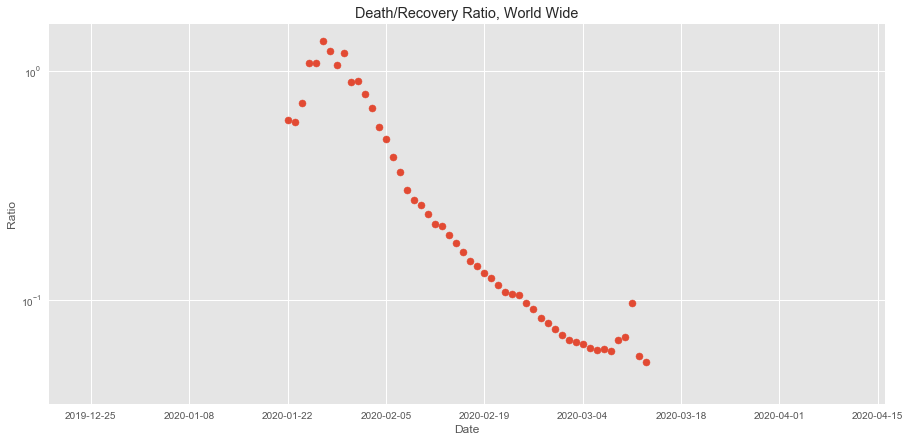

In [140]:
plt.scatter(wrld_count.index,wrld_count['Deaths']/wrld_count['Recovered'])
fig = plt.gcf(); ax = plt.gca()
fig.set_size_inches(15,7)
ax.set_title('Death/Recovery Ratio, World Wide')
ax.semilogy()
ax.set_xlabel('Date')
ax.set_ylabel('Ratio')


In [76]:
region_count

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

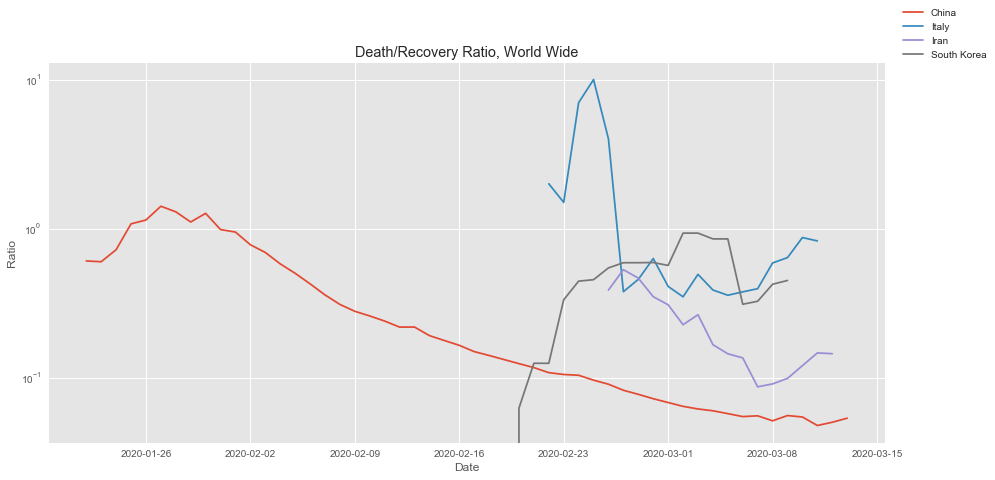

In [141]:
for country in top15[:4]:
    current = countries[countries['Country']==country]
    plt.plot(current.index,current['Deaths']/current['Recovered'],label=country)
    
current = countries
plt.plot(current.index,current['Deaths']/current['Recovered'],label=country)

fig = plt.gcf(); ax = plt.gca()
fig.set_size_inches(15,7)
ax.set_title('Death/Recovery Ratio, World Wide')
fig.legend()
ax.semilogy()
ax.set_xlabel('Date')
ax.set_ylabel('Ratio')
ax.set_autoscalex_on(True)

AttributeError: Unknown property labels

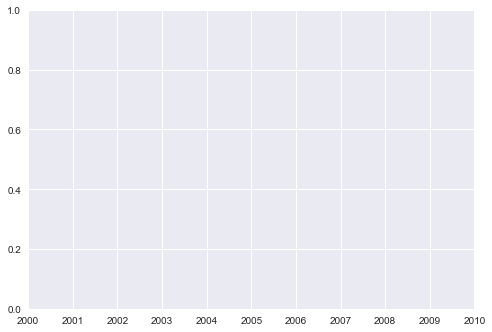

In [126]:
plt.plot(countries.index,countries['Deaths']/countries['Recovered'],labels=top15)
